In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Desenvolvimento de um projeto de Machine Learning

Existem diversas formas de se pensar em uma solução de aprendizagem de máquina. Dentre elas, uma das mais comuns é baseada na imagem a seguir. É pensando nela que iremos estruturar esta aplicação:

![workflow](https://drive.google.com/uc?id=1GW727JBslKyK3G3DRNz66J4OhLWUj_TE)


# 1 - Obtendo dados

In [3]:
#Lendo dados
dataBase = pd.read_csv("https://raw.githubusercontent.com/gilvandrocesardemedeiros/SPE_MiniCourseML/main/Oleo_Motor_Analise.csv")

In [4]:
#Verificando visualmente os dados
dataBase

,Km Atual,Km Troca,Fe,Cr,Pb,Cu,Sn,Al,Ni,Ag,Si,B,Na,Mg,Ca,Ba,P,Zn,Mo,Ti,V,K,Oxi,Nit,Sul,Ful,Agu,Gli,Dil,DiagComb,DiagCont,DiagCorr
0,88898.000000,14185.000000,87.000000,15.000000,7.000000,8.000000,8.000000,2.000000,0.000000,0.0,7.000000,0.0,196.000000,586.000000,1305.000000,0.000000,952.000000,1182.000000,0.000000,0.0,0.0,4.000000,0.030000,0.060000,0.210000,1.130000,0.1,0.08,2.0,0,0,0
1,100314.000000,14805.000000,99.000000,21.000000,10.000000,8.000000,10.000000,2.000000,0.000000,0.0,7.000000,0.0,193.000000,558.000000,1284.000000,0.000000,949.000000,1177.000000,0.000000,0.0,0.0,5.000000,0.050000,0.090000,0.250000,1.500000,0.1,0.08,2.0,1,0,0
2,436880.000000,3637.000000,146.000000,5.000000,13.000000,5.000000,6.000000,15.000000,1.000000,0.0,15.000000,0.0,242.000000,676.000000,1167.000000,0.000000,1038.000000,1317.000000,9.000000,0.0,0.0,7.000000,0.030000,0.030000,0.070000,0.450000,0.1,0.08,2.0,0,0,0
3,440134.000000,7124.000000,181.000000,6.000000,18.000000,4.000000,7.000000,14.000000,1.000000,0.0,17.000000,0.0,269.000000,846.000000,1386.000000,0.000000,1233.000000,1456.000000,11.000000,0.0,0.0,7.000000,0.030000,0.040000,0.090000,0.480000,0.1,0.08,2.0,0,0,0
4,446273.000000,5962.000000,243.000000,10.000000,34.000000,11.000000,9.000000,24.000000,1.000000,0.0,24.000000,0.0,261.000000,784.000000,1235.000000,0.000000,1146.000000,1430.000000,19.000000,0.0,0.0,5.000000,0.090000,0.100000,0.220000,1.170000,0.1,0.08,2.0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4480,340689.638719,8462.965819,337.624900,11.095347,36.667429,45.906368,11.714531,28.715102,0.476163,0.0,34.524408,0.0,236.089059,527.890362,2157.948098,15.715102,1242.997142,1660.421058,34.906368,0.0,0.0,4.333143,0.176669,0.215238,0.372860,1.961907,0.1,0.08,2.0,2,2,2
4481,358828.596593,16762.395920,418.295986,15.095678,112.035070,26.375169,15.604988,24.857162,4.120965,0.0,20.366472,0.0,281.241196,771.569282,1211.068948,0.000000,1117.575599,1439.684292,28.984957,0.0,0.0,5.877327,0.113783,0.157463,0.291312,1.701169,0.1,0.08,2.0,1,0,2
4482,345289.399601,7685.595140,263.110992,9.709042,26.963292,25.458365,8.595344,18.317813,0.822740,0.0,26.899729,0.0,314.761883,711.229234,1606.198601,5.317813,1279.387655,1756.076122,14.458365,0.0,0.0,6.759177,0.152408,0.211773,0.331271,1.934181,0.1,0.08,2.0,2,2,2
4483,343901.224636,7920.200056,285.598757,10.127419,29.891931,31.629426,9.536692,21.455641,0.718145,0.0,29.200803,0.0,291.018987,655.898872,1772.712657,8.455641,1268.405258,1727.208107,20.629426,0.0,0.0,6.027017,0.159730,0.212819,0.343823,1.942548,0.1,0.08,2.0,2,2,2


In [5]:
dataBase.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4485 entries, 0 to 4484
Data columns (total 32 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Km Atual  4485 non-null   float64
 1   Km Troca  4485 non-null   float64
 2   Fe        4485 non-null   float64
 3   Cr        4485 non-null   float64
 4   Pb        4485 non-null   float64
 5   Cu        4485 non-null   float64
 6   Sn        4485 non-null   float64
 7   Al        4485 non-null   float64
 8   Ni        4485 non-null   float64
 9   Ag        4485 non-null   float64
 10  Si        4485 non-null   float64
 11  B         4485 non-null   float64
 12  Na        4485 non-null   float64
 13  Mg        4485 non-null   float64
 14  Ca        4485 non-null   float64
 15  Ba        4485 non-null   float64
 16  P         4485 non-null   float64
 17  Zn        4485 non-null   float64
 18  Mo        4485 non-null   float64
 19  Ti        4485 non-null   float64
 20  V         4485 non-null   floa

In [6]:
#Explorando os dados numéricos
dataBase.describe().T

,count,mean,std,min,25%,50%,75%,max
Km Atual,4485.0,344280.276429,92458.536734,27752.00,301737.000000,340864.074402,376652.374841,883564.00
Km Troca,4485.0,11079.430260,3443.968920,1619.00,8761.576636,10250.849963,12966.000000,52697.00
Fe,4485.0,180.296705,103.260737,11.00,97.896549,166.647703,223.129934,542.00
Cr,4485.0,7.055411,5.343220,0.00,3.092565,5.702703,9.213946,31.00
Pb,4485.0,25.965130,20.318425,0.00,11.136919,22.253266,35.014602,127.00
Cu,4485.0,16.472495,16.224277,1.00,6.238038,10.553467,16.160023,74.00
Sn,4485.0,7.163284,4.208677,0.00,4.155775,6.043939,8.898337,27.00
Al,4485.0,14.466504,9.036329,1.00,8.200609,11.391475,18.092174,43.00
Ni,4485.0,0.869779,0.912381,0.00,0.101371,0.738467,1.036999,5.00
Ag,4485.0,0.020196,0.267064,0.00,0.000000,0.000000,0.000000,7.00


# 2 - Limpeza e preparação de dados

In [7]:
#Seus dados às vezes podem esconder informações que podem também ser úteis para o modelo
dataBase["Kms_Rodados"] = dataBase['Km Atual'] - dataBase['Km Troca']

In [8]:
#Eliminando colunas "Km Atual" e "Km Troca" da base de dados
dataBase = dataBase.drop(columns = ["Km Atual", "Km Troca"])

In [9]:
dataBase.head()

,Fe,Cr,Pb,Cu,Sn,Al,Ni,Ag,Si,B,Na,Mg,Ca,Ba,P,Zn,Mo,Ti,V,K,Oxi,Nit,Sul,Ful,Agu,Gli,Dil,DiagComb,DiagCont,DiagCorr,Kms_Rodados
0,87.0,15.0,7.0,8.0,8.0,2.0,0.0,0.0,7.0,0.0,196.0,586.0,1305.0,0.0,952.0,1182.0,0.0,0.0,0.0,4.0,0.03,0.06,0.21,1.13,0.1,0.08,2.0,0,0,0,74713.0
1,99.0,21.0,10.0,8.0,10.0,2.0,0.0,0.0,7.0,0.0,193.0,558.0,1284.0,0.0,949.0,1177.0,0.0,0.0,0.0,5.0,0.05,0.09,0.25,1.50,0.1,0.08,2.0,1,0,0,85509.0
2,146.0,5.0,13.0,5.0,6.0,15.0,1.0,0.0,15.0,0.0,242.0,676.0,1167.0,0.0,1038.0,1317.0,9.0,0.0,0.0,7.0,0.03,0.03,0.07,0.45,0.1,0.08,2.0,0,0,0,433243.0
3,181.0,6.0,18.0,4.0,7.0,14.0,1.0,0.0,17.0,0.0,269.0,846.0,1386.0,0.0,1233.0,1456.0,11.0,0.0,0.0,7.0,0.03,0.04,0.09,0.48,0.1,0.08,2.0,0,0,0,433010.0
4,243.0,10.0,34.0,11.0,9.0,24.0,1.0,0.0,24.0,0.0,261.0,784.0,1235.0,0.0,1146.0,1430.0,19.0,0.0,0.0,5.0,0.09,0.10,0.22,1.17,0.1,0.08,2.0,0,0,1,440311.0


In [10]:
#Funções para auxiliar na preparação dos dados:
def retirar_virgula(valor):
  try:
    return valor.replace(",", ".")
  except:
    return valor

def retirar_comparador(valor):
  try:
    return valor.replace("<", "").replace(">", "")
  except:
    return valor

In [11]:
for col in dataBase.columns:
  dataBase[col] = dataBase[col].apply(retirar_comparador)
  dataBase[col] = dataBase[col].apply(retirar_virgula)

In [12]:
dataBase.head()

,Fe,Cr,Pb,Cu,Sn,Al,Ni,Ag,Si,B,Na,Mg,Ca,Ba,P,Zn,Mo,Ti,V,K,Oxi,Nit,Sul,Ful,Agu,Gli,Dil,DiagComb,DiagCont,DiagCorr,Kms_Rodados
0,87.0,15.0,7.0,8.0,8.0,2.0,0.0,0.0,7.0,0.0,196.0,586.0,1305.0,0.0,952.0,1182.0,0.0,0.0,0.0,4.0,0.03,0.06,0.21,1.13,0.1,0.08,2.0,0,0,0,74713.0
1,99.0,21.0,10.0,8.0,10.0,2.0,0.0,0.0,7.0,0.0,193.0,558.0,1284.0,0.0,949.0,1177.0,0.0,0.0,0.0,5.0,0.05,0.09,0.25,1.50,0.1,0.08,2.0,1,0,0,85509.0
2,146.0,5.0,13.0,5.0,6.0,15.0,1.0,0.0,15.0,0.0,242.0,676.0,1167.0,0.0,1038.0,1317.0,9.0,0.0,0.0,7.0,0.03,0.03,0.07,0.45,0.1,0.08,2.0,0,0,0,433243.0
3,181.0,6.0,18.0,4.0,7.0,14.0,1.0,0.0,17.0,0.0,269.0,846.0,1386.0,0.0,1233.0,1456.0,11.0,0.0,0.0,7.0,0.03,0.04,0.09,0.48,0.1,0.08,2.0,0,0,0,433010.0
4,243.0,10.0,34.0,11.0,9.0,24.0,1.0,0.0,24.0,0.0,261.0,784.0,1235.0,0.0,1146.0,1430.0,19.0,0.0,0.0,5.0,0.09,0.10,0.22,1.17,0.1,0.08,2.0,0,0,1,440311.0


In [13]:
#Agora precisamos "quantificar" cada um dos diagnósticos. Podemos fazer desta forma:
for col_diag in ["DiagCorr", "DiagComb", "DiagCont"]:
  dataBase[col_diag] = dataBase[col_diag].replace("G", 0).replace("Y", 1).replace("R", 2)

In [14]:
dataBase.head()

,Fe,Cr,Pb,Cu,Sn,Al,Ni,Ag,Si,B,Na,Mg,Ca,Ba,P,Zn,Mo,Ti,V,K,Oxi,Nit,Sul,Ful,Agu,Gli,Dil,DiagComb,DiagCont,DiagCorr,Kms_Rodados
0,87.0,15.0,7.0,8.0,8.0,2.0,0.0,0.0,7.0,0.0,196.0,586.0,1305.0,0.0,952.0,1182.0,0.0,0.0,0.0,4.0,0.03,0.06,0.21,1.13,0.1,0.08,2.0,0,0,0,74713.0
1,99.0,21.0,10.0,8.0,10.0,2.0,0.0,0.0,7.0,0.0,193.0,558.0,1284.0,0.0,949.0,1177.0,0.0,0.0,0.0,5.0,0.05,0.09,0.25,1.50,0.1,0.08,2.0,1,0,0,85509.0
2,146.0,5.0,13.0,5.0,6.0,15.0,1.0,0.0,15.0,0.0,242.0,676.0,1167.0,0.0,1038.0,1317.0,9.0,0.0,0.0,7.0,0.03,0.03,0.07,0.45,0.1,0.08,2.0,0,0,0,433243.0
3,181.0,6.0,18.0,4.0,7.0,14.0,1.0,0.0,17.0,0.0,269.0,846.0,1386.0,0.0,1233.0,1456.0,11.0,0.0,0.0,7.0,0.03,0.04,0.09,0.48,0.1,0.08,2.0,0,0,0,433010.0
4,243.0,10.0,34.0,11.0,9.0,24.0,1.0,0.0,24.0,0.0,261.0,784.0,1235.0,0.0,1146.0,1430.0,19.0,0.0,0.0,5.0,0.09,0.10,0.22,1.17,0.1,0.08,2.0,0,0,1,440311.0


<h3> Avaliando agora o balanceamento entre as classes

In [15]:
dataBase["DiagCorr"].value_counts()

0    2172
1    1446
2     867
Name: DiagCorr, dtype: int64

In [16]:
dataBase["DiagComb"].value_counts()

0    1801
1    1435
2    1249
Name: DiagComb, dtype: int64

In [17]:
dataBase["DiagCont"].value_counts()

0    2495
1    1299
2     691
Name: DiagCont, dtype: int64

<h3> Estamos quase prontos para treinar o modelo. Precisamos agora separar os dados que utilizaremos para treino e teste. 
<ul><li><h3>Para efetuar esta separação, uma boa prática é selecionar de maneira aleatória uma determinada proporção dos dados para treino e outra para teste, de modo a garantir que os dados selecionados sejam não-enviesados.</li>
<li><h3>Esta seleção deve garantir que a base de dados de treinamento é suficientemente representativa, para que o algoritmo possa aprender os padrões necessários para resolver o problema</li>
<li><h3>Deve garantir também que a base de dados de teste equivale ao mais próximo possível de situações reais: dados completamente desconhecidos, de nenhum modo existentes na base de dados de treino.</li>
<li><h3>Por fim, uma proporção de 20 a 30% dos dados para teste é bastante usual para uma ampla variedade de problemas.</li></ul>

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
#Estamos selecionando aqui um target por vez para classificarmos, mas poderíamos fazer diferente.

target = "DiagCorr"
x = dataBase.drop(columns = ["DiagCorr", "DiagComb", "DiagCont"])
y = dataBase[target]

In [20]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

#3 - Treinamento do modelo

In [21]:
from sklearn.tree import DecisionTreeClassifier

In [22]:
model = DecisionTreeClassifier(max_depth=3)
model.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

# 4 - Testando modelo

In [23]:
y_predicted = model.predict(x_test)

In [24]:
from sklearn.metrics import confusion_matrix

In [25]:
matriz_confusao = confusion_matrix(y_test, y_predicted)

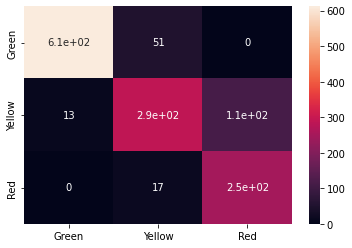

In [26]:
sns.heatmap(matriz_confusao, annot=True, xticklabels=["Green", "Yellow", "Red"], yticklabels = ["Green", "Yellow", "Red"])

In [27]:
print("Precisão - Classe Green: ")
print(100 * matriz_confusao[0][0] / (matriz_confusao[0][0] + matriz_confusao[1][0] + matriz_confusao[2][0]), "%\n")

print("Precisão - Classe Yellow: ")
print(100 * matriz_confusao[1][1] / (matriz_confusao[0][1] + matriz_confusao[1][1] + matriz_confusao[2][1]), "%\n")

print("Precisão - Classe Red: ")
print(100 * matriz_confusao[2][2] / (matriz_confusao[0][2] + matriz_confusao[1][2] + matriz_confusao[2][2]), "%\n")

print("Acurácia: ")
print(100 * (matriz_confusao[0][0] + matriz_confusao[1][1] + matriz_confusao[2][2]) / sum(sum(matriz_confusao)), "%")

Precisão - Classe Green: 
97.92 %

Precisão - Classe Yellow: 
80.95238095238095 %

Precisão - Classe Red: 
68.68131868131869 %

Acurácia: 
85.51263001485884 %


In [28]:
from sklearn import tree

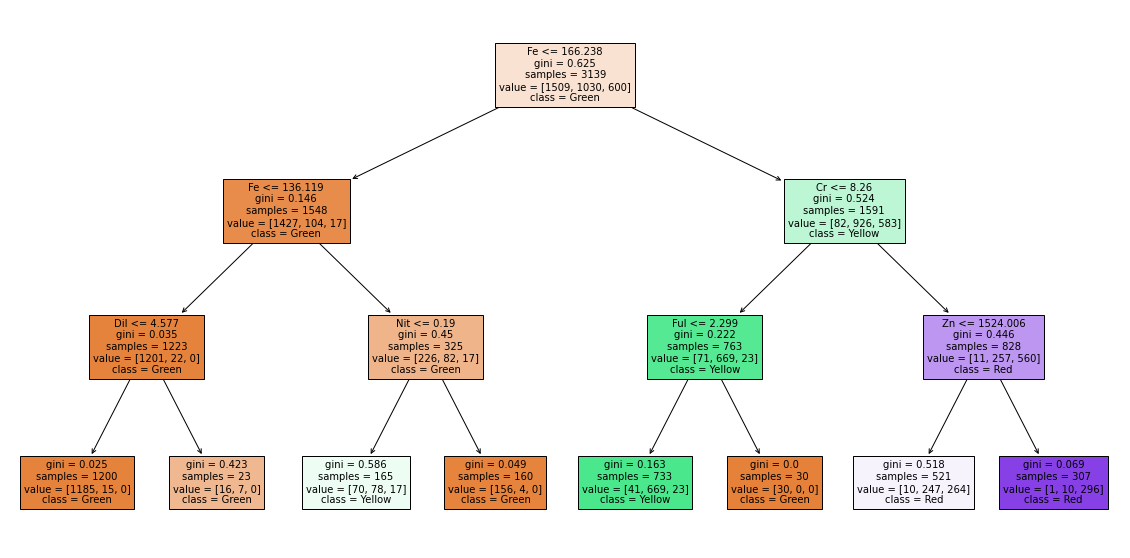

In [29]:
plt.figure(figsize=(20, 10))
tree.plot_tree(model, feature_names= x_test.columns, 
               class_names=["Green", "Yellow", "Red"], filled=True)
plt.show()

# O primeiro modelo já foi treinado e validado. Os resultados poderiam melhorar? Certamente! Agora vamos para a etapa: <br>
#5 - Aprimorar

<h3> Algoritmo RandomForest


In [30]:
from sklearn.ensemble import RandomForestClassifier

In [31]:
model = RandomForestClassifier()
model.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [32]:
y_predicted = model.predict(x_test)

In [33]:
matriz_confusao = confusion_matrix(y_test, y_predicted)

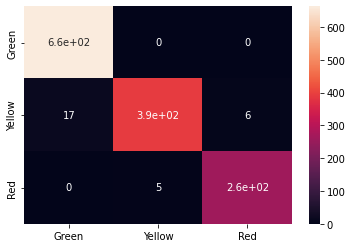

In [34]:
sns.heatmap(matriz_confusao, annot=True, xticklabels=["Green", "Yellow", "Red"], yticklabels = ["Green", "Yellow", "Red"])

In [35]:
print("Precisão - Classe Green: ")
print(100 * matriz_confusao[0][0] / (matriz_confusao[0][0] + matriz_confusao[1][0] + matriz_confusao[2][0]), "%\n")

print("Precisão - Classe Yellow: ")
print(100 * matriz_confusao[1][1] / (matriz_confusao[0][1] + matriz_confusao[1][1] + matriz_confusao[2][1]), "%\n")

print("Precisão - Classe Red: ")
print(100 * matriz_confusao[2][2] / (matriz_confusao[0][2] + matriz_confusao[1][2] + matriz_confusao[2][2]), "%\n")

print("Acurácia: ")
print(100 * (matriz_confusao[0][0] + matriz_confusao[1][1] + matriz_confusao[2][2]) / sum(sum(matriz_confusao)), "%")

Precisão - Classe Green: 
97.5 %

Precisão - Classe Yellow: 
98.74371859296483 %

Precisão - Classe Red: 
97.76119402985074 %

Acurácia: 
97.91976225854383 %


<h3> Algoritmo XGBoost

In [41]:
import xgboost as xgb

In [42]:
model = xgb.XGBClassifier()
model.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [43]:
y_predicted = model.predict(x_test)

In [44]:
matriz_confusao = confusion_matrix(y_test, y_predicted)

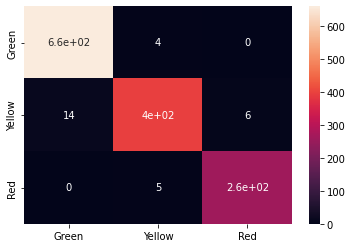

In [45]:
sns.heatmap(matriz_confusao, annot=True, xticklabels=["Green", "Yellow", "Red"], yticklabels = ["Green", "Yellow", "Red"])

In [46]:
print("Precisão - Classe Green: ")
print(100 * matriz_confusao[0][0] / (matriz_confusao[0][0] + matriz_confusao[1][0] + matriz_confusao[2][0]), "%\n")

print("Precisão - Classe Yellow: ")
print(100 * matriz_confusao[1][1] / (matriz_confusao[0][1] + matriz_confusao[1][1] + matriz_confusao[2][1]), "%\n")

print("Precisão - Classe Red: ")
print(100 * matriz_confusao[2][2] / (matriz_confusao[0][2] + matriz_confusao[1][2] + matriz_confusao[2][2]), "%\n")

print("Acurácia: ")
print(100 * (matriz_confusao[0][0] + matriz_confusao[1][1] + matriz_confusao[2][2]) / sum(sum(matriz_confusao)), "%")

Precisão - Classe Green: 
97.91976225854383 %

Precisão - Classe Yellow: 
97.77777777777777 %

Precisão - Classe Red: 
97.76119402985074 %

Acurácia: 
97.84546805349183 %
